# HW1 Solution Write-up

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
# from sklearn import linear_model
# from sklearn.metrics import mean_squared_error, r2_score

### Q1. Simulate Data

In [3]:
np.random.seed(6996)

# error term
epsilon_vec = np.random.normal(0,1,500).reshape(500,1)
# X_matrix or regressors or predictiors 
X_mat = np.random.normal(0,2,size = (500,500))
# Slope
slope_vec = np.random.uniform(1,5,500)
# Simulate Ys
Y_mat = 1 + np.cumsum(X_mat * slope_vec,axis=1)[:,1:] + epsilon_vec
# each col of Y_mat representing one simulation vector: starting with 2 regressors, end with 500
print(Y_mat.shape)


(500, 499)


In [12]:
Y_mat

array([[ 1.00987688e+00, -1.23928302e+01, -2.52348083e+01, ...,
        -9.40828736e+01, -8.94859754e+01, -9.41810407e+01],
       [-9.39086099e-01, -4.55984426e+00,  2.47910006e+00, ...,
         4.01843551e+01,  2.67192369e+01,  2.99347410e+01],
       [ 5.67395961e+00,  4.85111843e+00, -4.22952948e+00, ...,
        -1.85530195e+02, -1.86304468e+02, -1.82864664e+02],
       ...,
       [ 6.19909598e+00,  1.37464000e+01,  1.85455979e+01, ...,
        -4.38843772e+01, -3.62341149e+01, -3.87596111e+01],
       [ 1.56808789e+00, -8.65975077e+00, -2.07566359e+01, ...,
        -2.98972971e+02, -2.88410497e+02, -2.84620548e+02],
       [ 5.12446322e-02, -2.91396452e+00, -2.01108211e+01, ...,
        -4.74432836e+01, -4.05453717e+01, -4.57828132e+01]])

## Analysis of accuracy of inference as function of number of predictors


### Q2.  P-Values

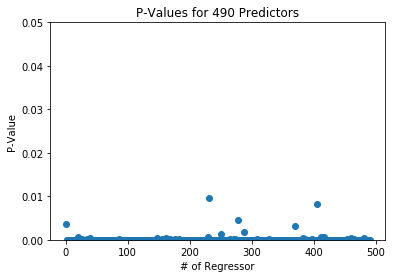

In [5]:
X_sub = sm.add_constant(X_mat[:,0:490])
Y_sub = Y_mat[:,488]
# Create linear regression object
regr = sm.OLS(Y_sub,X_sub).fit()
# plot p-values
plt.scatter(range(len(regr.pvalues)),regr.pvalues)
plt.title("P-Values for 490 Predictors")
plt.xlabel("# of Regressor")
plt.ylabel("P-Value")
plt.ylim((0,0.05))
plt.show()


### Q3.  R Square

In [6]:
def add_reg(num,level=0.05):
    if num < 2:
        print('not enough regressor selected')
        return
    else:
        num = int(num)
        # Regressor Matrix ＋ Constant
        X = sm.add_constant(X_mat[:,0:num]) 
        # Dependent Variable Vector
        y = Y_mat[:,num-2]  
        ols_reg = sm.OLS(y,X).fit()
        # R square
        r2 = ols_reg.rsquared 
        # confidence interval
        intv = ols_reg.conf_int(alpha=level)[1]
        return r2,intv
        
        


In [7]:
result = list(map(add_reg, range(2,501)))

r = []
lower_bound = []
upper_bound = []
for item in result:
    r.append(item[0])
    lower_bound.append(item[1][0])
    upper_bound.append(item[1][1])

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


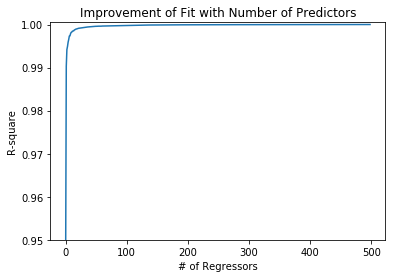

In [8]:
plt.plot(range(len(r)),r)
plt.title("Improvement of Fit with Number of Predictors")
plt.xlabel("# of Regressors")
plt.ylabel("R-square")
plt.ylim((0.95,1.0005))
plt.show()


### Q4. Confidence Interval

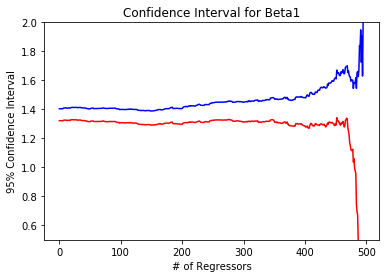

In [11]:
plt.plot(lower_bound,'r')
plt.plot(upper_bound,'b')
plt.title("Confidence Interval for Beta1")
plt.xlabel("# of Regressors")
plt.ylabel("95% Confidence Interval")
plt.ylim((0.5,2))
plt.show()